In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.utils.data as data
from torchvision import transforms
#from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

import logging
import urllib
import sys
import os
import zipfile
from os.path import join, exists

In [20]:
# 1.Importing all the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import randint
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, CuDNNGRU, Conv1D, CuDNNLSTM, concatenate
from keras.layers import Bidirectional, GlobalMaxPool1D, Dropout, SpatialDropout1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from tensorflow import keras
from keras.utils import to_categorical
from gensim.models.doc2vec import LabeledSentence
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
# import emoji
!pip install contractions
import contractions
from sklearn.metrics import classification_report
import os
from os.path import join, exists
from keras.utils.data_utils import get_file
import sys
import time
from imblearn.over_sampling import RandomOverSampler,SMOTE, ADASYN
from collections import Counter
from collections import defaultdict
from nltk.stem import SnowballStemmer
# from tqdm import tqdm
# tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
from sklearn import neighbors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

ImportError: cannot import name 'RandomUnderSampler' from 'imblearn.over_sampling' (C:\Users\reshm\Anaconda3\lib\site-packages\imblearn\over_sampling\__init__.py)

In [3]:
# def column_values_tolist(output_list,df,col_name):
#   for i in range(len(df)):
#     output_list.append(df[col_name][i])
#   return output_list

# #As an example :

# #question_1_list = []

# #question_1_list = column_values_tolist(question_1_list,dataframe,"question_1")

In [52]:
## Instance of Model , here model has bert and pooling layer on top of it

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')


I0423 10:59:20.294292  4852 SentenceTransformer.py:29] Load pretrained SentenceTransformer: bert-base-nli-mean-tokens
I0423 10:59:20.314237  4852 SentenceTransformer.py:32] Did not find a '/' or '\' in the name. Assume to download model from server.
I0423 10:59:20.349177  4852 SentenceTransformer.py:67] Load SentenceTransformer from folder: C:\Users\reshm/.cache\torch\sentence_transformers\public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_bert-base-nli-mean-tokens.zip
I0423 10:59:20.457367  4852 configuration_utils.py:281] loading configuration file C:\Users\reshm/.cache\torch\sentence_transformers\public.ukp.informatik.tu-darmstadt.de_reimers_sentence-transformers_v0.2_bert-base-nli-mean-tokens.zip\0_BERT\config.json
I0423 10:59:20.490278  4852 configuration_utils.py:319] Model config BertConfig {
  "_num_labels": 2,
  "architectures": null,
  "attention_probs_dropout_prob": 0.1,
  "bad_words_ids": null,
  "bos_token_id": null,
  "decoder_start_token_id": null,


In [53]:
#Example

#question_1_embeddings = model.encode(question_1_list)

In [18]:
Data_path = 'questions.csv'
Data = pd.read_csv(Data_path)
Data.drop(Data[Data.isnull().any(axis=1)].index,inplace=True)
Data['question1'] = Data['question1'].astype('str')
Data['question2'] = Data['question2'].astype('str')
train, test = train_test_split(Data, test_size=0.1)
# train, validation = train_test_split(train, test_size=0.1)

In [19]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
# validation = validation.reset_index(drop=True)

In [20]:
train.shape

(363913, 6)

In [21]:
test.shape

(40435, 6)

In [9]:
test_q1_list = test.question1.tolist()
test_q1 = model.encode(test_q1_list)

Batches: 100%|█████████████████████████████████████████████████████████████████████| 5055/5055 [36:52<00:00,  2.28it/s]


In [10]:
# storing the data/lists as binary data stream

import pickle

with open('test_q1.data', 'wb') as filehandle:
    pickle.dump(test_q1, filehandle)

In [13]:
# storing the data/lists as binary data stream

import pickle

with open('test_q1.txt', 'wb') as filehandle:
    pickle.dump(test_q1, filehandle)

In [11]:
type(test_q1)

list

In [12]:
len(test_q1)

40435

In [15]:
len(test_q1[0])

768

In [42]:
test_q2_list = test.question2.tolist()
test_q2 = model.encode(test_q2_list)

Batches: 100%|█████████████████████████████████████████████████████████████████████| 5055/5055 [35:51<00:00,  2.35it/s]


In [43]:
# storing the data/lists as binary data stream

import pickle

with open('test_q2.data', 'wb') as filehandle:
    pickle.dump(test_q2, filehandle)

In [44]:
# storing the data/lists as binary data stream

import pickle

with open('test_q2.txt', 'wb') as filehandle:
    pickle.dump(test_q2, filehandle)

In [46]:
train_q1_list = train.question1.tolist()
train_q1 = model.encode(train_q1_list)

Batches: 100%|████████████████████████████████████████████████████████████████| 45490/45490 [12:43:07<00:00,  1.01s/it]


In [47]:
# storing the data/lists as binary data stream

import pickle

with open('train_q1.data', 'wb') as filehandle:
    pickle.dump(train_q1, filehandle)

In [48]:
# storing the data/lists as binary data stream    

import pickle

with open('train_q1.txt', 'wb') as filehandle:
    pickle.dump(train_q1, filehandle)

In [56]:
train_q2_list = train.question2.tolist()
train_q2 = model.encode(train_q2_list)

Batches: 100%|████████████████████████████████████████████████████████████████| 45490/45490 [13:03:53<00:00,  1.03s/it]


In [57]:
# storing the data/lists as binary data stream

import pickle

with open('train_q2.data', 'wb') as filehandle:
    pickle.dump(train_q2, filehandle)

In [58]:
# storing the data/lists as binary data stream

import pickle

with open('train_q2.txt', 'wb') as filehandle:
    pickle.dump(train_q2, filehandle)

In [4]:
##Reading back lists with pickle


import pickle

with open('train_q1.data', 'rb') as filehandle:
    # read the data as binary data stream
    train_q1 = pickle.load(filehandle)

In [5]:
##Reading back lists with pickle


import pickle

with open('train_q2.data', 'rb') as filehandle:
    # read the data as binary data stream
    train_q2 = pickle.load(filehandle)

In [6]:
##Reading back lists with pickle


import pickle

with open('test_q1.data', 'rb') as filehandle:
    # read the data as binary data stream
    test_q1 = pickle.load(filehandle)

In [7]:
##Reading back lists with pickle


import pickle

with open('test_q2.data', 'rb') as filehandle:
    # read the data as binary data stream
    test_q2 = pickle.load(filehandle)

In [8]:
##Reading back lists with pickle


import pickle

with open('label_test.data', 'rb') as filehandle:
    # read the data as binary data stream
    label_test = pickle.load(filehandle)


In [12]:
##Reading back lists with pickle


import pickle

with open('label_train.txt', 'rb') as filehandle:
    # read the data as binary data stream
    label_train = pickle.load(filehandle)

In [13]:
import itertools
X_train = [list(itertools.chain.from_iterable([train_q1[i]] + [train_q2[i]])) for i in range(len(train_q1))]
X_test = [list(itertools.chain.from_iterable([test_q1[i]] + [test_q2[i]])) for i in range(len(test_q1))]

In [21]:
# X_train = train_q1 + train_q2
# # X_test = test_q1 + test_q2
# X_train = xtrain_sen1_glove + xtrain_sen2_glove
# X_test = xtest_sen1_glove + xtest_sen2_glove

In [16]:
# y_train = train["is_duplicate"].values
# y_test = test["is_duplicate"].values
y_train = label_train
y_test = label_test

In [88]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.5593421540744404
Testing F1 score: 0.5392264344520752


Classification Report
               precision    recall  f1-score   support

           0       0.63      0.74      0.68     25512
           1       0.36      0.26      0.30     14923

    accuracy                           0.56     40435
   macro avg       0.50      0.50      0.49     40435
weighted avg       0.53      0.56      0.54     40435



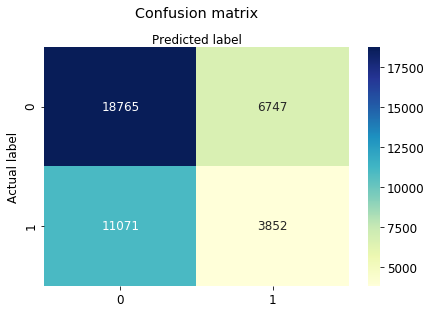

In [89]:
print('Classification Report\n',classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)

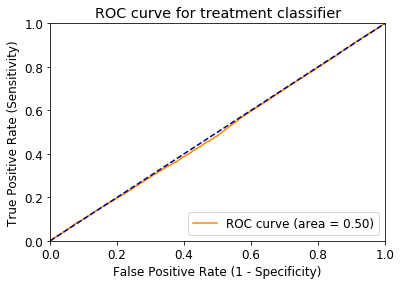

In [90]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

In [82]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.5566959317423025
Testing F1 score: 0.5423219951515146


Classification Report
               precision    recall  f1-score   support

           0       0.63      0.71      0.67     25512
           1       0.37      0.29      0.32     14923

    accuracy                           0.56     40435
   macro avg       0.50      0.50      0.50     40435
weighted avg       0.54      0.56      0.54     40435



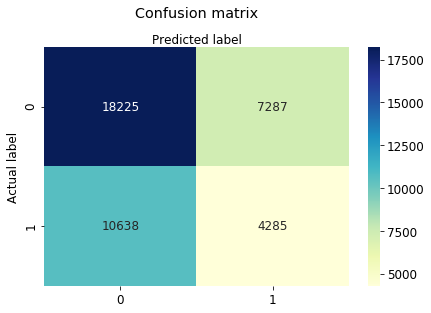

In [83]:
print('Classification Report\n',classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)

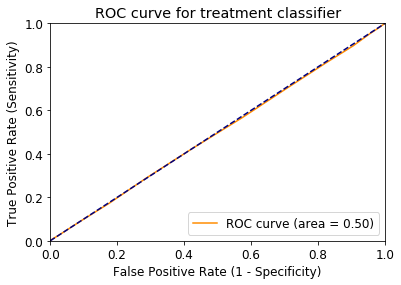

In [84]:
y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

In [17]:
def undersampleData(train_X, train_y):
    rus = RandomUnderSampler(random_state=0)
    X_resampled, y_resampled = rus.fit_resample(train_X, train_y)
    return X_resampled, y_resampled

In [24]:
from imblearn.under_sampling import RandomUnderSampler

X_resampled, y_resampled = undersampleData(X_train, y_train)

In [25]:
forest = RandomForestClassifier(n_estimators = 20)
forest.fit(X_resampled, y_resampled)
y_pred=forest.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.5252133053048101
Testing F1 score: 0.5307532876052323


Classification Report
               precision    recall  f1-score   support

           0       0.64      0.58      0.61     25615
           1       0.37      0.42      0.39     14820

    accuracy                           0.53     40435
   macro avg       0.50      0.50      0.50     40435
weighted avg       0.54      0.53      0.53     40435



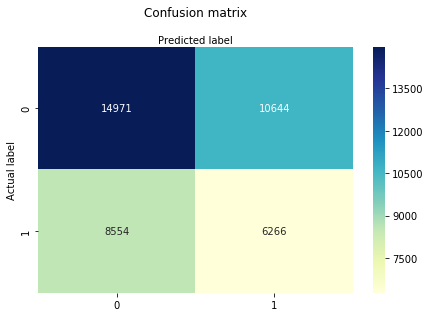

In [26]:
print('Classification Report\n',classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)

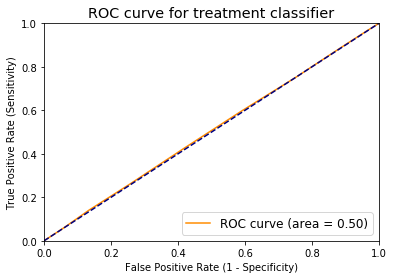

In [27]:
y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

In [28]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_resampled, y_resampled)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.496030666501793
Testing F1 score: 0.5051624723039542


Classification Report
               precision    recall  f1-score   support

           0       0.63      0.49      0.55     25615
           1       0.36      0.50      0.42     14820

    accuracy                           0.50     40435
   macro avg       0.50      0.50      0.49     40435
weighted avg       0.53      0.50      0.51     40435



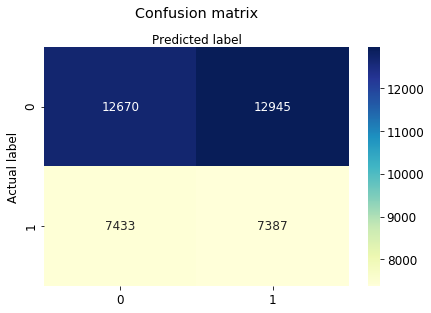

In [29]:
print('Classification Report\n',classification_report(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix(cnf_matrix)


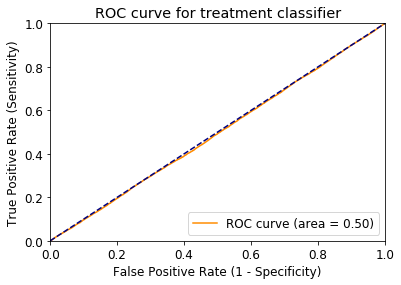

In [30]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show() 

In [22]:
label_train = train["is_duplicate"].tolist()
label_test = test["is_duplicate"].tolist()

In [24]:
len(label_test)

40435

In [11]:
type(label_train)

list

In [4]:
# storing the data/lists as binary data stream

import pickle

with open('label_train.data', 'wb') as filehandle:
    pickle.dump(label_train, filehandle)

In [26]:
# storing the data/lists as binary data stream

import pickle

with open('label_train.txt', 'wb') as filehandle:
    pickle.dump(label_train, filehandle)

In [10]:
# storing the data/lists as binary data stream

import pickle

with open('label_test.data', 'wb') as filehandle:
    pickle.dump(label_test, filehandle)

In [28]:
# storing the data/lists as binary data stream

import pickle

with open('label_test.txt', 'wb') as filehandle:
    pickle.dump(label_test, filehandle)

In [144]:
df_task2_train = pd.DataFrame(
    {'q1': train_q1,
     'q2': train_q2,
     'label': label_train
    })
df_task2_test = pd.DataFrame(
    {'q1': test_q1,
     'q2': test_q2,
     'label': label_test
    })

In [145]:
train_q1_list = df_task2_train.q1.tolist()
test_q1_list = df_task2_test.q1.tolist()

In [146]:
train_q2_list = df_task2_train[df_task2_train.label == 0].q2.tolist()
test_q2_list = df_task2_test[df_task2_test.label == 0].q2.tolist()

In [147]:
task2_q1 = train_q1_list + test_q1_list
task2_q2 = train_q2_list + test_q2_list

In [148]:
questions = task2_q1 + task2_q2

In [149]:
len(questions)

659390

In [150]:
df_task2 = pd.DataFrame(
    {'questions': questions,
    })

In [152]:
task2_questions = df_task2.questions.tolist()

In [153]:
len(task2_questions)

659390

In [154]:
# storing the data/lists as binary data stream

import pickle

with open('task2_questions.data', 'wb') as filehandle:
    pickle.dump(task2_questions, filehandle)

In [155]:
# storing the data/lists as binary data stream

import pickle

with open('task2_questions.txt', 'wb') as filehandle:
    pickle.dump(task2_questions, filehandle)

In [156]:
len(task2_questions[0])

768

In [0]:
# # storing the data/lists as binary data stream

# import pickle

# with open('question_1_embeddings.data', 'wb') as filehandle:
#     pickle.dump(sentece_B_meanpool_embedding, filehandle)